<a href="https://www.kaggle.com/code/simronw/netflix-movies-tv-shows-content-analysis?scriptVersionId=177825115" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv


In [2]:
# Importing dataset from kaggle
df = pd.read_csv("/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv", encoding = 'latin1')

In [3]:
# Display first 10 rows in the dataset
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [5]:
# Summary of Statistics for numerical columns in dataset
df.describe()

,release_year,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,8809.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2014.181292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.818932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1925.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checking for null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [7]:
# Deleting unwanted columns from dataset
df.drop(df.iloc[:,12:26], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [9]:
# Checking the number of rows and columns present in the dataset
df.shape

(8809, 12)

In [10]:
# Replace null values in 'director', 'cast', 'country', 'date_added', 'rating', and 'duration'
# with appropriate placeholders or imputation
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)


In [11]:
df['date_added'].fillna(method='ffill', inplace=True)  # Forward fill missing values
df['rating'].fillna(df['rating'].mode()[0], inplace=True)  # Fill with mode

In [12]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [13]:
# Exploratory data Analysis
df['type'].value_counts()

type
Movie      6132
TV Show    2677
Name: count, dtype: int64

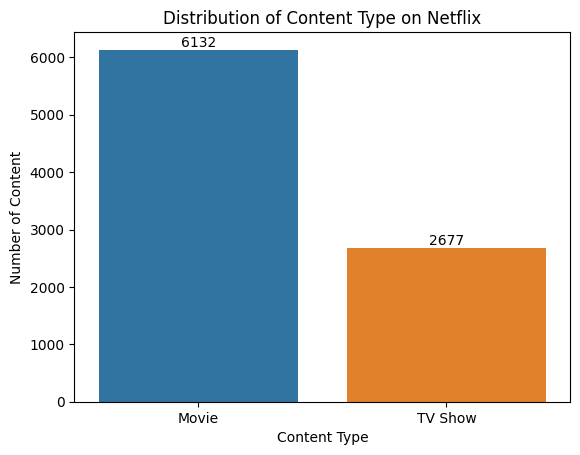

In [14]:
# Analysing number of Movies and TV show present in the dataset
ax = sns.countplot(x='type', data=df)
ax.set_title("Distribution of Content Type on Netflix")
ax.set_xlabel("Content Type")
ax.set_ylabel("Number of Content")
for label in ax.containers:
    ax.bar_label(label)

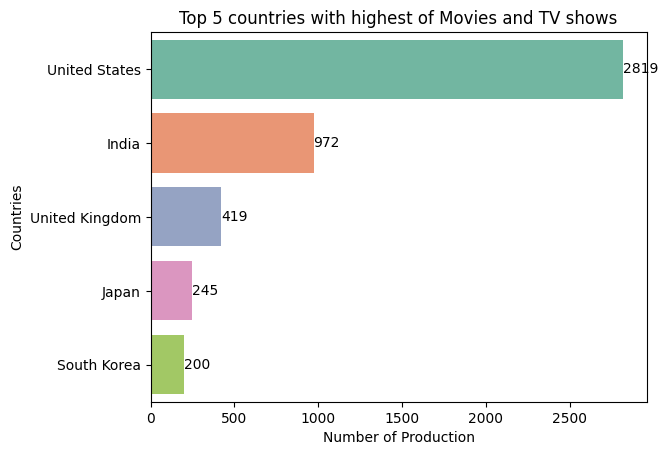

In [15]:
# Top 5 countries with most production of Movies and TV shows
top_5 = df['country'].value_counts().head(6)
top_5 = top_5.drop("Unknown")
bx = sns.barplot(y=top_5.index, x= top_5.values, data=df, palette='Set2')
bx.figsize=(10,6)
bx.set_title("Top 5 countries with highest of Movies and TV shows")
bx.set_ylabel("Countries")
bx.set_xlabel("Number of Production")
for label in bx.containers:
    bx.bar_label(label)

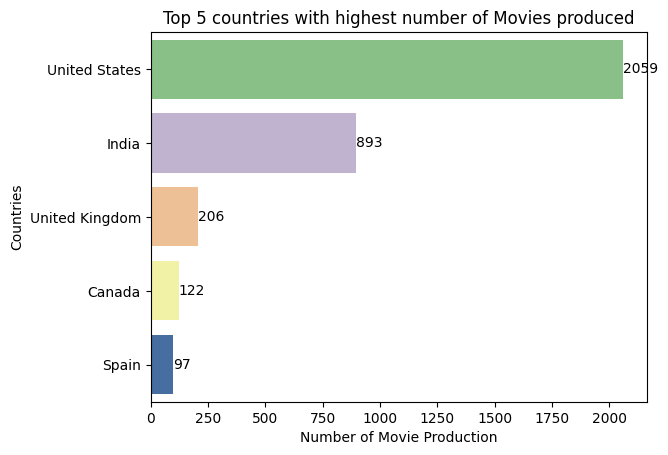

In [16]:
# Top 5 countries with highest Movies produced
top_5_m = df[df.type == 'Movie']
count_per_year= top_5_m.country.value_counts().head(6)
count_per_year.drop("Unknown", inplace = True)
cx = sns.barplot(y=count_per_year.index, x=count_per_year.values, data=df, palette='Accent')
cx.figsize=(10,6)
cx.set_title("Top 5 countries with highest number of Movies produced")
cx.set_ylabel("Countries")
cx.set_xlabel("Number of Movie Production")
for label in cx.containers:
    cx.bar_label(label)

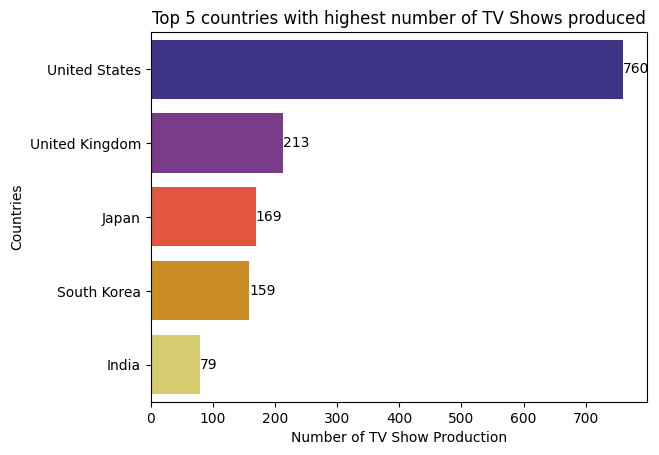

In [17]:
# Top 5 countries with highest TV Shows produced
top_5_tv = df[df.type == 'TV Show']
count_per_year= top_5_tv.country.value_counts().head(6)
count_per_year.drop("Unknown", inplace = True)
dx = sns.barplot(y=count_per_year.index, x=count_per_year.values, data=df, palette='CMRmap')
dx.figsize=(10,6)
dx.set_title("Top 5 countries with highest number of TV Shows produced")
dx.set_ylabel("Countries")
dx.set_xlabel("Number of TV Show Production")
for label in dx.containers:
    dx.bar_label(label)

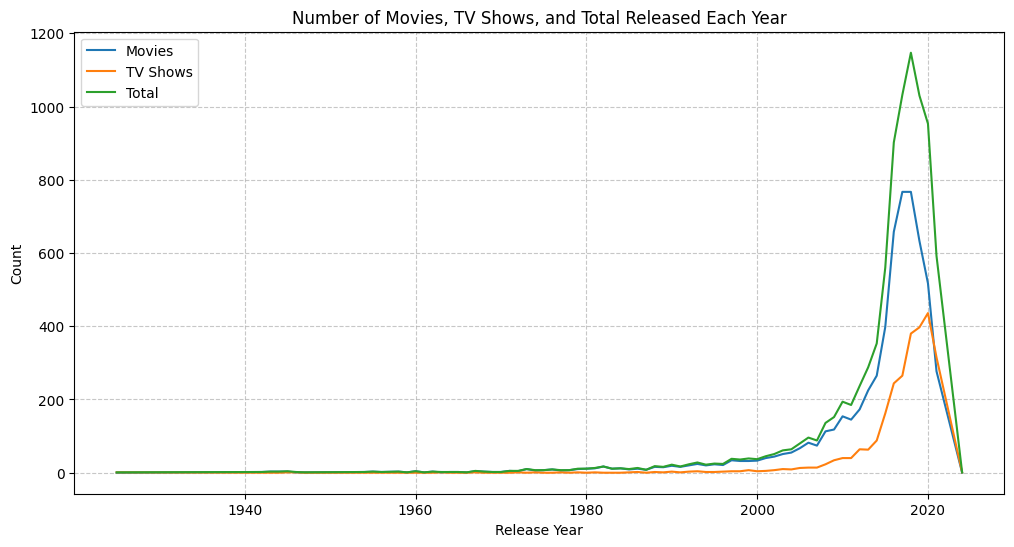

In [18]:
# Analysing number of Movies, TV Shiws and Total Released each year
# Group the data by 'release_year' and 'type', and count the occurrences
type_counts = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Calculate the total count of movies and TV shows each year
type_counts['total'] = type_counts['Movie'] + type_counts['TV Show']

# Reset the index to make 'release_year' a column
type_counts = type_counts.reset_index()

# Plotting using Seaborn line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=type_counts, x='release_year', y='Movie', label='Movies')
sns.lineplot(data=type_counts, x='release_year', y='TV Show', label='TV Shows')
sns.lineplot(data=type_counts, x='release_year', y='total', label='Total')
plt.title('Number of Movies, TV Shows, and Total Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)

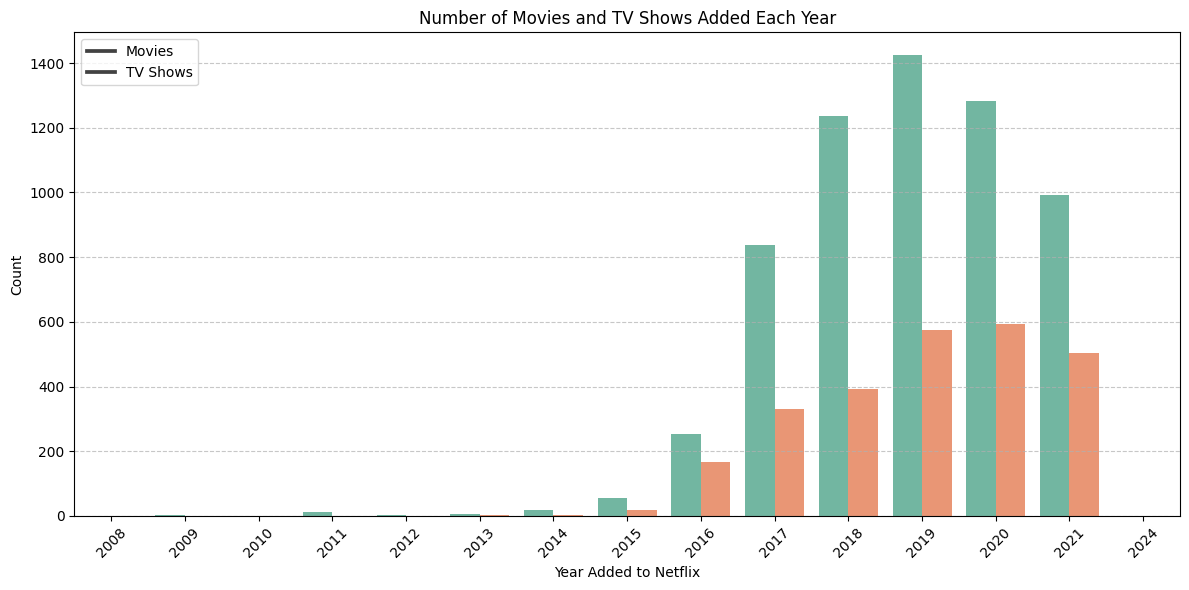

In [19]:
# Visualizing Number of Movies and TV Shows added each year
# Convert 'date_added' column to datetime format, handling errors by coercing to NaN
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows with NaN values (invalid dates)
df.dropna(subset=['date_added'], inplace=True)

# Extract the year from the 'date_added' column
df['year_added'] = df['date_added'].dt.year

# Group the data by 'year_added' and 'type', and count the occurrences
added_counts = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Reset index to make 'year_added' a column
added_counts.reset_index(inplace=True)

# Melt the DataFrame to make it suitable for Seaborn
added_counts_melted = added_counts.melt(id_vars='year_added', var_name='Type', value_name='Count')

# Plotting using Seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=added_counts_melted, x='year_added', y='Count', hue='Type', palette='Set2')
plt.title('Number of Movies and TV Shows Added Each Year')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Count')
plt.legend(title=None, loc='upper left', labels=['Movies', 'TV Shows'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

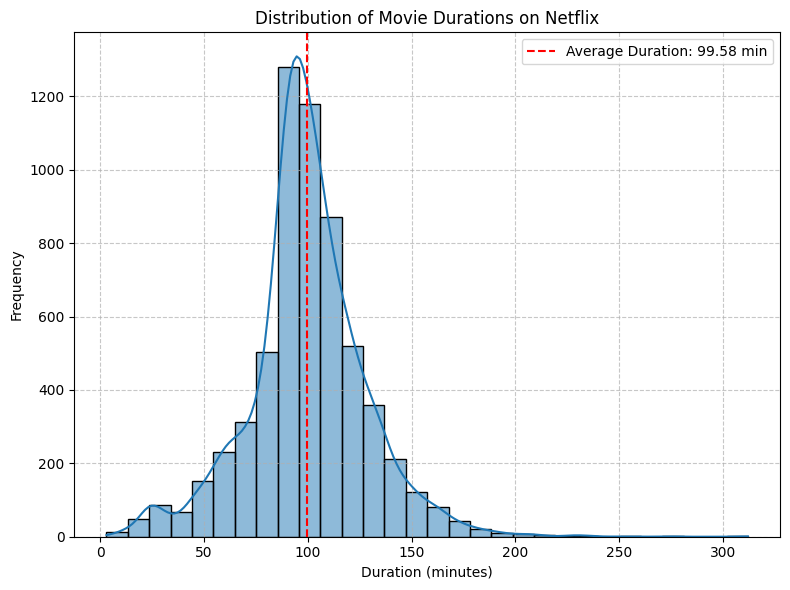

In [20]:
# Average duration of Movie on Netflix
# Filter the DataFrame to include only movies
movies_df = df[df['type'] == 'Movie']

# Convert 'duration' column to numeric (assuming it's in a format like '90 min')
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(float)

# Calculate the average duration of movies
avg_duration = movies_df['duration'].mean()

# Plotting using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=movies_df, x='duration', bins=30, kde=True)
plt.axvline(x=avg_duration, color='red', linestyle='--', label=f'Average Duration: {avg_duration:.2f} min')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

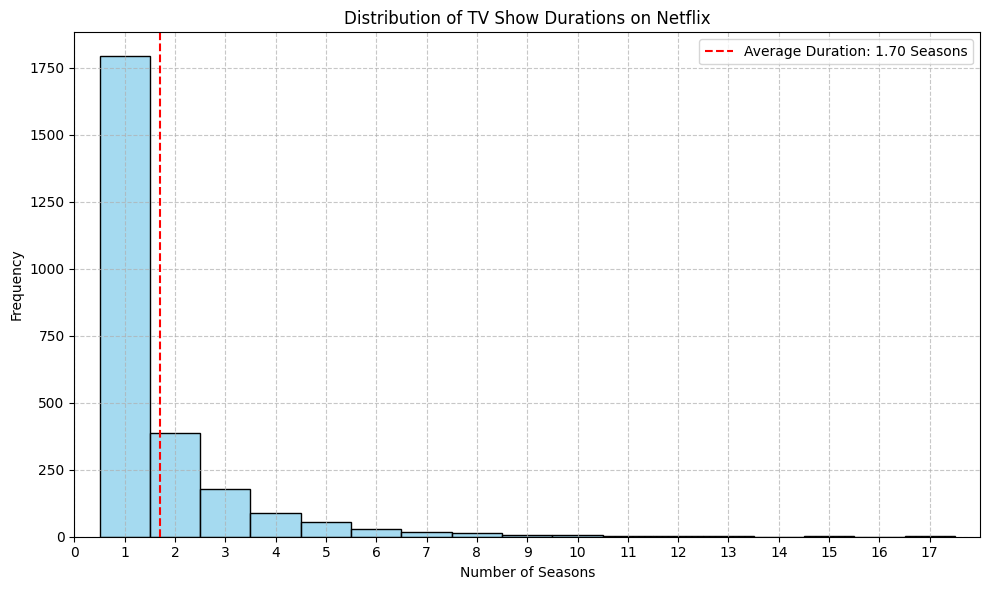

In [21]:
# Average duration of TV Show on Netflix
# Filter the DataFrame to include only TV shows
tv_shows_df = df[df['type'] == 'TV Show']

# Extract the numeric part (number of seasons) from the 'duration' column and convert it to integers
tv_shows_df['duration'] = tv_shows_df['duration'].str.extract('(\d+)').astype(float)

# Calculate the average duration of TV shows
avg_duration = tv_shows_df['duration'].mean()

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=tv_shows_df, x='duration', discrete=True, bins=20, color='skyblue')
plt.axvline(x=avg_duration, color='red', linestyle='--', label=f'Average Duration: {avg_duration:.2f} Seasons')
plt.title('Distribution of TV Show Durations on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, int(tv_shows_df['duration'].max()) + 1, 1))  # Adjust x-axis ticks
plt.xlim(0, int(tv_shows_df['duration'].max()) + 1)  # Adjust x-axis limit
plt.tight_layout()
plt.show()

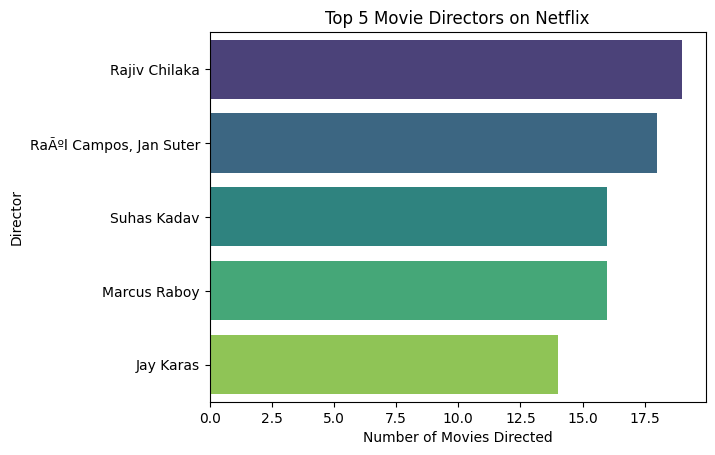

In [22]:
#Top 5 Movie director on Netflix
top_movies_director = df.director.value_counts().sort_values(ascending=False).head(6)
top_movies_director = top_movies_director.drop('Unknown')
# Plotting using Seaborn bar plot
sns.barplot(data=df, y=top_movies_director.index, x=top_movies_director.values, palette='viridis')
plt.title('Top 5 Movie Directors on Netflix')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Director')
plt.show()

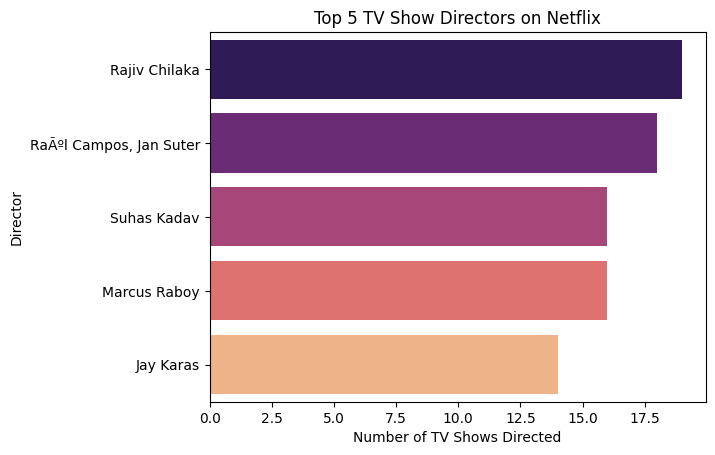

In [23]:
top_tvshow_director = df.director.value_counts().sort_values(ascending=False).head(6)
top_tvshow_director = top_tvshow_director.drop('Unknown')
# Plotting using Seaborn bar plot
sns.barplot(data=df, y=top_movies_director.index, x=top_movies_director.values, palette='magma')
plt.title('Top 5 TV Show Directors on Netflix')
plt.xlabel('Number of TV Shows Directed')
plt.ylabel('Director')
plt.show()